In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv("country-data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot:>

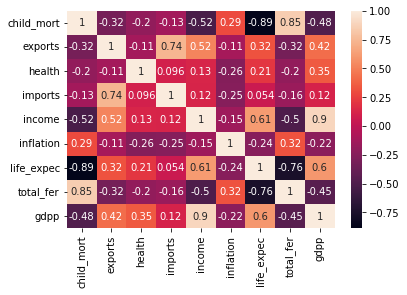

In [4]:
cor = data.corr()
sns.heatmap(cor,annot=True)

<h2>Exploratory Data Analysis</h2>

In [5]:
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})

In [6]:
px.scatter(data_frame=data, x='exports', y='imports',size='gdpp', text='country', color='gdpp', title='Countries by Export & Import and corresponding GDP')

In [7]:
int_cols= data.select_dtypes(exclude='object').columns

In [9]:
for i in int_cols:
    fig=px.choropleth(data_frame=data, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

In [10]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(data.drop(['country'], axis=1))

In [11]:
from sklearn.decomposition import PCA
decom = PCA(svd_solver='auto')
decom.fit(df_scaled)

PCA()

In [14]:
from sklearn.cluster import k_means
ac = k_means(n_clusters=3)
ac.fit_predict(df_scaled)


TypeError: k_means() missing 1 required positional argument: 'X'